In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import kerastuner as kt
from PIL import Image
plt.style.use('default')

/opt/anaconda3/envs/deeplr/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  if __name__ == '__main__':


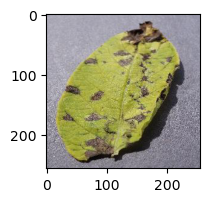

In [2]:
#checking the sample img
path="/Users/draculalemon/Downloads/PlantVillage/train/Potato___Early_blight/e0552fed-9af3-4fbd-80e8-09151a839cf9___RS_Early.B 7576.JPG"
img=image.load_img(path)
plt.figure(figsize=(15,2))
plt.imshow(img)

In [3]:
#reading the shape of the image
cv2.imread(path).shape

(256, 256, 3)

In [4]:
#normalizing the data
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [5]:
train_dataset1=train.flow_from_directory('/Users/draculalemon/Downloads/PlantVillage/train/',
                                       target_size=(200,200),color_mode="rgb",
                                        shuffle=True,
                                        class_mode="categorical")


Found 2054 images belonging to 3 classes.


In [6]:
validation_dataset=validation.flow_from_directory('/Users/draculalemon/Downloads/PlantVillage/validation/',
                                        class_mode="categorical",color_mode="rgb",
                                        shuffle=True,
                                       target_size=(200,200))

Found 106 images belonging to 3 classes.


In [8]:
#seeing the labels of the pic we have given
train_dataset1.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [9]:
#cnn with maxpooling
cnn_model1=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation="relu",                                 
                                        input_shape=(200,200,3)),tf.keras.layers.MaxPool2D(2,2),
                                        #1
                                        tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #2
                                        tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #3
                                        tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #flatten layes
                                        tf.keras.layers.Flatten(),
                                        #dense layers
                                        tf.keras.layers.Dense(500,activation='relu'),
                                        ##dense2
                                        tf.keras.layers.Dense(3,activation='softmax')
                                        ])

2022-03-15 10:49:41.453275: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-15 10:49:41.454710: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [10]:
#compiling the dataset
cnn_model1.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [11]:
#fitting the model
model_fit=cnn_model1.fit(train_dataset1,epochs=18,
                        validation_data=validation_dataset)

Train for 65 steps, validate for 4 steps
Epoch 1/18
65/65 [==============================] - 118s 2s/step - loss: 0.5489 - accuracy: 0.7488 - val_loss: 0.1647 - val_accuracy: 0.9434
Epoch 2/18
65/65 [==============================] - 116s 2s/step - loss: 0.2187 - accuracy: 0.9085 - val_loss: 0.2233 - val_accuracy: 0.9057
Epoch 3/18
65/65 [==============================] - 118s 2s/step - loss: 0.1586 - accuracy: 0.9377 - val_loss: 0.1005 - val_accuracy: 0.9717
Epoch 4/18
65/65 [==============================] - 121s 2s/step - loss: 0.1008 - accuracy: 0.9640 - val_loss: 0.1950 - val_accuracy: 0.8868
Epoch 5/18
65/65 [==============================] - 121s 2s/step - loss: 0.0704 - accuracy: 0.9742 - val_loss: 0.0881 - val_accuracy: 0.9717
Epoch 6/18
65/65 [==============================] - 120s 2s/step - loss: 0.1019 - accuracy: 0.9591 - val_loss: 0.2126 - val_accuracy: 0.9057
Epoch 7/18
65/65 [==============================] - 120s 2s/step - loss: 0.0917 - accuracy: 0.9659 - val_loss: 0.

# Making the prediction

In [12]:
dir_path="/Users/draculalemon/Downloads/PlantVillage/test"

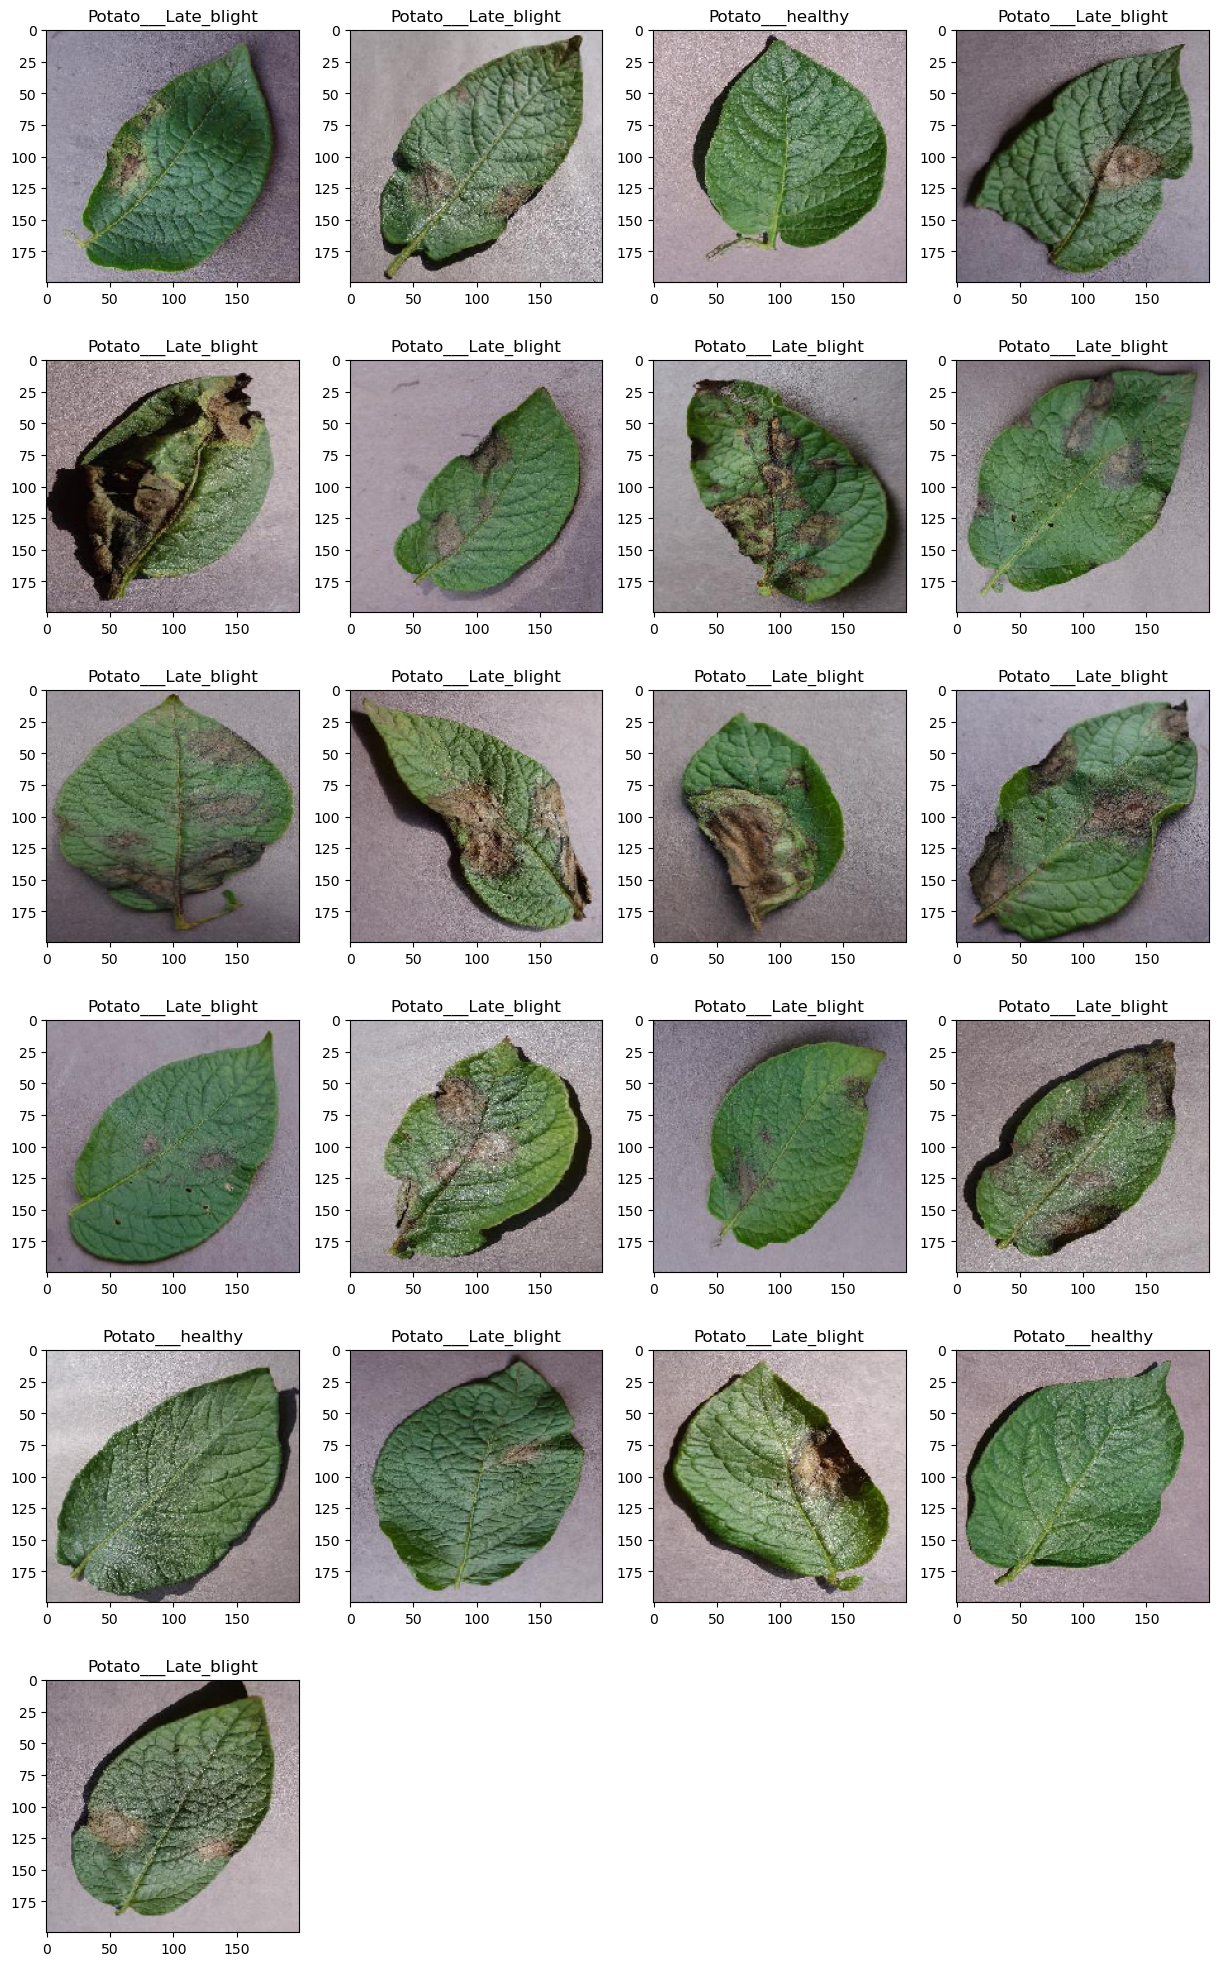

In [13]:
#reading every single image in the path
plt.figure(figsize=(15,25))
for count,i in enumerate(os.listdir(dir_path)):
    img=image.load_img(dir_path+"//"+i,target_size=(200,200))
    plt.subplot(6,4,count+1)
    plt.imshow(img)
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    values1=np.argmax(cnn_model1.predict(images/255),axis=1)
    if values1==0:        
        plt.title('Potato___Early_blight')
    elif values1==1:
         plt.title('Potato___Late_blight')
    else:
         plt.title('Potato___healthy')    
plt.show()

# saving the model

In [20]:
#  saveing the model
cnn_model1.save('/Users/draculalemon/Downloads/plant_health_leaf.h5')
print('Model Saved!')

Model Saved!


In [21]:
#loading the model
load_cnn=tf.keras.models.load_model('/Users/draculalemon/Downloads/plant_health_leaf.h5')